## 回溯法

回溯法有“通用的解题法”之称，用它可以系统地搜索一个问题的所有解或任一解。回溯法是一个既带有系统性又带有跳跃性的搜索算法。它在包含问题的所有解的解空间树中，按照**深度优先**的策略，从根结点出发搜索解空间树。算法搜索至解空间树的任一结点时，总是先判断该结点是否肯定不包含问题的解。如果肯定不包含，则跳过对以该结点为根的子树的系统搜索，逐层向其祖先结点回溯; 否则，进入该子树，继续按深度优先的策略进行搜索。回溯法在用来求问题的所有解时要回溯到根，且根结点的所有子树都已被搜索遍才结束; 而用来求问题的任一解时，只要搜索到问题的一个解就可以结束。这种以深度优先的方式系统地搜索问题的解的方法称为回溯法，它适用于解一些组合数较大的问题。


### 回溯法的基本思想

在确定了解空间的组织结构后，回溯法从开始结点（根结点）出发，以**深度优先**的方式搜索整个解空间。这个开始结点就成为一个活结点，同时也成为当前的扩展结点。在当前的扩展结点处，搜索向纵深方向移至一个新结点。这个新结点就成为一个新的活结点，并成为当前扩展结点。如果在当前扩展结点处不能再向纵深方向移动，则当前的扩展结点就成为死结点。换句话说，这个结点不再是一个活结点。此时，应往回移动(回溯）至最近的一个活结点处，并使这个活结点成为当前的扩展结点。回溯法即以这种工作方式递归地在解空间中搜索，直到找到所要求的解或解空间中已无活结点时为止。

### 回溯法的限界函数

问题的解空间往往很大，为了有效地进行搜索，需要在搜索的过程中对某些结点进行剪枝，而对哪些结点进行剪枝，需要设计限界函数来判断。因此，限界函数的设计是回溯法的一个核心问题，也是一个很难的问题。设计限界函数的通用的指导原则是尽可能多和尽可能早地“杀掉”不可能产生最优解的活结点。好的限界函数可以大大减少问题的搜索空间，从而大大提高算法的效率。

### 回溯法的实例

1. n皇后问题
2. 0-1 背包问题


#### n皇后问题

这是来源于国际象棋的一个问题。n皇后问题要求在一个n×n格的棋盘上放置n个皇后，使得它们彼此不受攻击。按照国际象棋的规则，一个皇后可以攻击与之处在同一行或同一列或同一条斜线上的其他任何棋子。因此，n皇后问题等价于要求在一个n×n格的棋盘上放置n个皇后，使得任何两个皇后不能被放在同一行或同一列或同一条斜线上。
求解过程从空棋盘开始，设在第Ⅰ行至第m行都已经正确地放置了m个皇后，再在第m+l行上找合适的位置放第m+1个皇后，直到在第n行也找到合适的位置放置第n个皇后，就找到了一个解。接着改变第n行上皇后的位置，希望获得下一个解。另外，在任一行上有n种可选的位置。开始时，位置在第1列，以后改变时，顺次选择第2列、第3列、…、第n列。当第n列也不是一个合理的位置时，就要回溯，去改变前一行的位置。

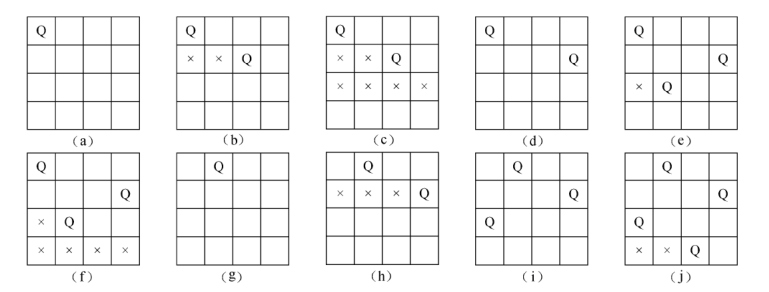

举例，我们用java实现8皇后问题[^1]


In [ ]:
// 皇后数
private final static int max = 4;
private static int[] array = new int[max];

private static int count = 0;

public static void main(String[] args){
    check(0);
}

// 放置第n个皇后
public static void check(int n){
    // n是从0开始的，因此在n+1 == 8时，就代表8个皇后已经放好
    if (n == max) {
        System.out.println("第 " + ++count + "种情况");
        // 输出放好的8皇后位置
        for (int k = 0 ; k < array.length ; k++) {
            System.out.print(array[k] + " ");
        }
        System.out.println();
        return;
    }
    // 依次放入皇后，并判断是否有冲突
    for(int i = 0; i < max; i++) {
        // 先把当前这个皇后n，放到该行的第一列
        array[n] = i;
        // 判断当放置第n个皇后到i列时，是否冲突
        if (judge(n)) {
            // 如果不冲突，接着放n+1个皇后
            check(n+1);
        }
        // 如果冲突，就继续执行 array[n] = i, 即将第n个皇后，放置位置向后移动一个位置
    }
}

// 校验放置第n个皇后时，是否与之前已经放置的皇后位置有冲突
public static boolean judge(int n){
    for (int i = 0 ; i < n ; i++) {
        // 1、array[i] == array[n] 判断第n个皇后是否与前面的n-1个皇后在同一列
        // 2、Math.abs(n-i) == Math.abs(array[n] - array[i]) 判断第n个皇后是否与第i个皇后在同一斜线
        // 3、不用判断是否在同一行，n每次都在递增
        if (array[i] == array[n] || Math.abs(n-i) == Math.abs(array[n] - array[i])) {
            return false;
        }
    }
    return true;
}

[^1]:[回溯法（八皇后问题）及Java语言实现 - 知乎](https://zhuanlan.zhihu.com/p/199293851)